<a href="https://colab.research.google.com/github/lakshmi-devagiri/Data-Science/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__ )


2.17.1


In this version the keras is integrated with it.

In [2]:
#import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')

In [6]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Here, Based on this feature we need to find weather customer wants to exit the bank or not. Here is exit is dependent feature and rest of them are in dependent varaiable.


In [7]:
# Dividing Dependent ad independent Features
X=dataset.iloc[:,3:13] # Here, I need all the rows but the colums i need only 3 to 13 columns
Y=dataset.iloc[:,13]# here, i am taking all the rows and 13th column

In [8]:
geography = pd.get_dummies(X['Geography'], drop_first=True).astype(int)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [9]:
gender = pd.get_dummies(X['Gender'], drop_first=True).astype(int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [10]:
X=pd.concat([X,geography,gender],axis=1)

In [11]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [14]:
Y.head()# Dependent Variable

,Exited
0,1
1,0
2,1
3,0
4,0


In [15]:
# train-Test_ Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test) # to avoid data leakage.

In [17]:
X_train


array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
X_train.shape

(8000, 11)

In [20]:
## Part2 Now lets create the ANN
from tensorflow.keras.models import Sequential #
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU, ELU
from tensorflow.keras.layers import Dropout

In [21]:
#Lets Intialize ANN
classifier=Sequential()

In [22]:
# Adding the Input Layer
classifier.add(Dense(units=11,activation='relu'))

In [23]:
# Addimg the first hidden Layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [24]:
# Addimg the Second hidden Layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [25]:
# Adding the Output Layer
# here, the output is binary Classification. so, I am  using activation Function is Sigmoid
classifier.add(Dense(1,activation='sigmoid'))

In [26]:
# Now Training the entire neural network
# Here, I am using Binary Cross Entropy Loss function since it is Binary Classification.
# Here, adam optimizer but default takes its learning rate
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Changed 'complile' to 'compile'

In [27]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [28]:
# when ever you see your accuracy is not stoping.
# It is basically stops training when a monitored metrics has stopped improving
import tensorflow as tf
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,

)

In [29]:
# train our neural network
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=early_stopping_monitor)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7555 - loss: 0.6161 - val_accuracy: 0.7955 - val_loss: 0.4934
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7917 - loss: 0.5152 - val_accuracy: 0.7955 - val_loss: 0.4606
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7966 - loss: 0.4844 - val_accuracy: 0.7955 - val_loss: 0.4482
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7876 - loss: 0.4773 - val_accuracy: 0.7955 - val_loss: 0.4382
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7954 - loss: 0.4598 - val_accuracy: 0.7955 - val_loss: 0.4330
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7994 - loss: 0.4480 - val_accuracy: 0.7955 - val_loss: 0.4295
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.4406 - val_accuracy: 0.7963 - val_loss: 0.4197
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8009 - loss: 0.4260 - val_accuracy: 0.

In [30]:
# Now, let see at what epoch it is going to stop.
# here my Epoch stoped at 36
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

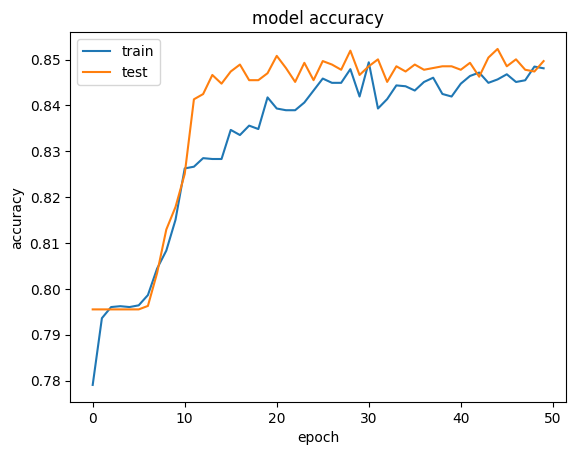

In [31]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

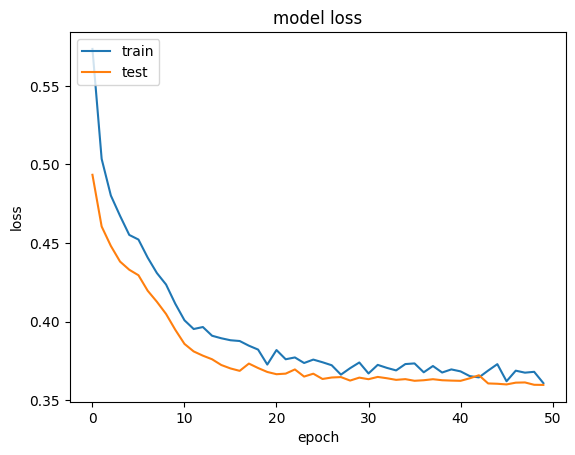

In [32]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [33]:
# part-3
# predicting the test results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [34]:
# make the confusion metrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1544,   51],
       [ 222,  183]])

In [35]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,y_pred)
acc

0.8635

In [36]:
# get the weights
classifier.get_weights()

[array([[ 0.24627843, -0.07382374, -0.02644207,  0.04857699, -0.02498571,
          0.00498981, -0.00927791,  0.1876879 , -0.04161116,  0.08907084,
          0.06612298],
        [-0.26165947,  0.00651973,  0.06394129,  0.15362196,  0.25028175,
         -0.7742755 , -0.7451115 , -0.71916467,  0.21395631, -0.03592786,
          0.39836255],
        [ 0.23823012,  0.13837454, -0.11529576, -0.01961584,  0.02294818,
          0.02857786, -0.04955892, -0.11760511, -0.10443525,  0.10166265,
         -0.01084447],
        [-0.39770493, -0.3036174 , -0.13094148,  0.6415841 , -0.55361795,
         -0.25007668, -0.11973125,  0.10469564, -0.13392814, -0.17153324,
         -0.13325644],
        [ 0.16887009, -0.00145421, -1.0335661 ,  0.84303063, -1.3095657 ,
         -0.05826522,  0.10348593, -0.19275503,  0.9659796 ,  0.44899458,
         -0.02992558],
        [-0.19751853, -0.20084283,  0.0568994 , -0.09226833, -0.1424176 ,
          0.18247558, -0.03917613,  0.05687061,  0.02408491,  0.2616844